# Imports

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab
%matplotlib inline

 # Read the data

In [7]:
df = pd.read_csv("FuelConsumption.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


# Data exploration

In [8]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [18]:
cdf = df[["ENGINESIZE", "CO2EMISSIONS"]]
cdf.head()

,ENGINESIZE,CO2EMISSIONS
0,2.0,196
1,2.4,221
2,1.5,136
3,3.5,255
4,3.5,244


# Visualize the data

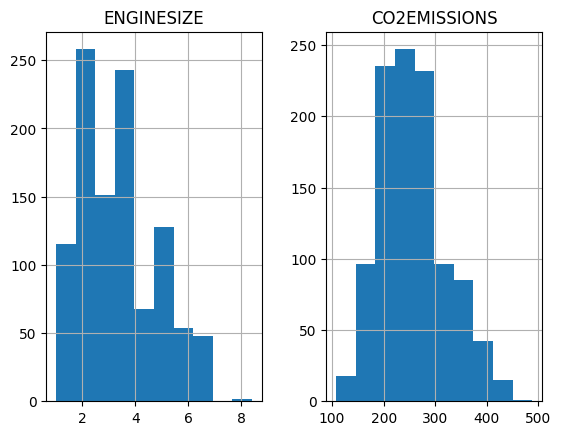

In [19]:
viz = cdf[["ENGINESIZE", "CO2EMISSIONS"]]
viz.hist()
plt.show()

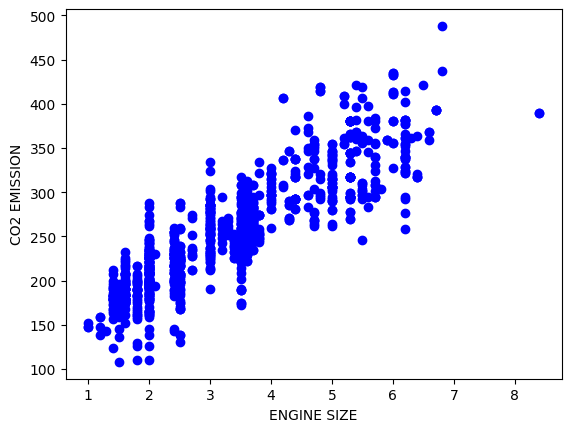

In [20]:
plt.scatter(cdf["ENGINESIZE"], cdf["CO2EMISSIONS"], color='blue')
plt.xlabel("ENGINE SIZE")
plt.ylabel("CO2 EMISSION")
plt.show()

# Regression  >>>> data separation

In [23]:
msk = np.random.rand(len(df)) < 0.8
train_data = cdf[msk]
test_data = cdf[~msk]
print(msk)
print(~msk)
print(cdf)
print(train_data)
print(test_data)

[ True  True  True ...  True  True  True]
[False False False ... False False False]
      ENGINESIZE  CO2EMISSIONS
0            2.0           196
1            2.4           221
2            1.5           136
3            3.5           255
4            3.5           244
...          ...           ...
1062         3.0           271
1063         3.2           264
1064         3.0           271
1065         3.2           260
1066         3.2           294

[1067 rows x 2 columns]
      ENGINESIZE  CO2EMISSIONS
0            2.0           196
1            2.4           221
2            1.5           136
3            3.5           255
4            3.5           244
...          ...           ...
1061         3.2           258
1063         3.2           264
1064         3.0           271
1065         3.2           260
1066         3.2           294

[885 rows x 2 columns]
      ENGINESIZE  CO2EMISSIONS
13           5.9           359
21           2.0           214
38           2.0           239

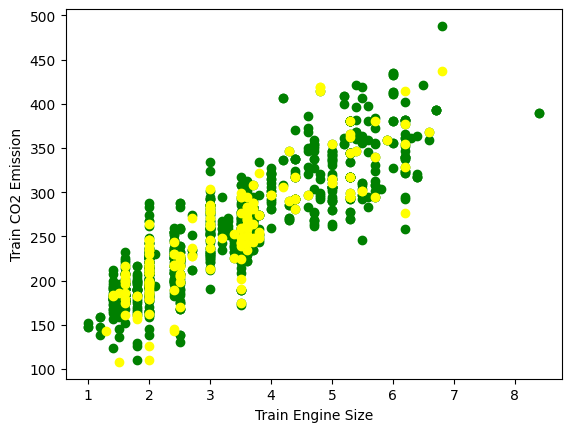

In [29]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(train_data["ENGINESIZE"], train_data["CO2EMISSIONS"], color='green')
ax1.scatter(test_data["ENGINESIZE"], test_data["CO2EMISSIONS"], color='yellow')
plt.xlabel('Train Engine Size')
plt.ylabel('Train CO2 Emission')
plt.show()

# Regression

In [34]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train_data[["ENGINESIZE"]])
train_y = np.asanyarray(train_data[["CO2EMISSIONS"]])
regr.fit(train_x, train_y)
print('coefficient: ', regr.coef_)
print('intercept: ', regr.intercept_)

coefficient:  [[38.91110064]]
intercept:  [126.34414068]


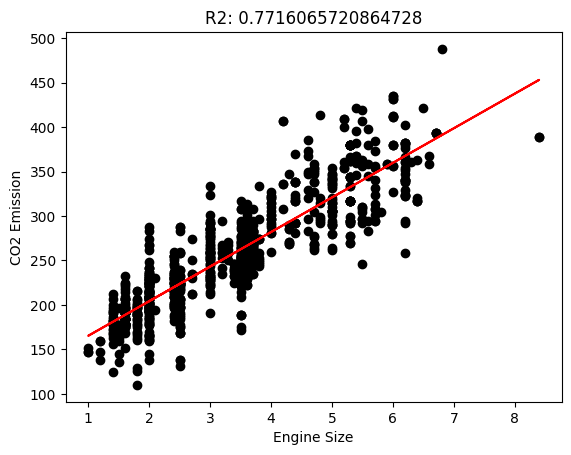

In [40]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(train_data["ENGINESIZE"], train_data["CO2EMISSIONS"], color='black')
ax1.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel('Engine Size')
plt.ylabel('CO2 Emission')

from sklearn.metrics import r2_score
ax1.set_title('R2: ' + str(r2_score(train_y, regr.coef_[0][0]*train_x + regr.intercept_[0])))
plt.show()

# Evaluation

In [42]:
test_x = np.asanyarray(test_data[["ENGINESIZE"]])
test_y = np.asanyarray(test_data[["CO2EMISSIONS"]])
test_y_ = regr.predict(test_x)

print("MAE: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("MSE: %.2f" %  np.mean((test_y_ - test_y)**2))
print("R2: %.2f" % r2_score(test_y, test_y_))

MAE: 23.77
MSE: 1038.30
R2: 0.72
